## Problem Statement

The use of machine learning algorithms in credit risk assessment has become increasingly popular in recent years, as it has the potential to improve accuracy and efficiency in lending decisions. However, the lack of transparency and interpretability of these models can lead to concerns about potential biases or errors, particularly in cases where the model decisions have significant impacts on people's lives and livelihoods.

Despite advancements in financial technology, the issue of credit risk remains a major challenge for banks and lending institutions. Traditional methods of credit risk assessment such as credit scoring models are limited in their ability to accurately predict risk. Also, traditional credit risk models are often viewed as "black boxes," making it difficult for decision-makers to understand how and why a certain risk assessment was made. This lack of transparency can lead to mistrust and uncertainty in the risk assessment process. As a result, there is a need for more advanced and reliable credit risk models to minimize the risk of default and improve decision-making processes.

Explainable AI (XAI) is an approach to machine learning that aims to increase transparency and interpretability of models, allowing humans to understand how the model arrived at its decision. In the context of credit risk, XAI can help lenders and borrowers understand why a particular loan was approved or denied, which factors played the most significant role in the decision and identify potential areas for improvement.

The goal of this research is to develop an explainable artificial intelligence (XAI) model for credit risk assessment that leverages the latest advancements in XAI techniques. The proposed model will provide transparent and interpretable insights into the risk assessment process, enabling decision-makers to better understand and justify their risk assessments. The model will be evaluated on its ability to accurately predict credit risk and its transparency and interpretability will be compared with existing models to demonstrate its effectiveness. The research will also investigate the trade-off between model transparency and accuracy and explore the potential benefits and limitations of XAI. 

### Experiment Details

An organization wants to predict the possible defaulters for the consumer loans product. They have data about historic customer behavior on earlier credit products such as loan. Hence, for acquiring new customers for providing new credit, the organization wants to predict the riskier customers who are likely to default. We are required to use the training dataset to identify the patterns that predict “potential” defaulters.

### Dataset Link

https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior?select=Training+Data.csv

### About Data

- ID: Id of the user(All Unique)
- Income: Income of the user
- Age: Age of the user
- Experience: Professional experience of the user in years
- Profession: Profession of the user
- Married/Single: Whether married or not
- House_Ownership: Owned or rented or neither
- Car_Ownership: Does the person own a car
- STATE: State of residence
- CITY: City of residence
- CURRENT_JOB_YRS: Years of experience in the current job
- CURRENT_HOUSE_YRS: Number of years in the current residence
- Risk_Flag: Defaulted on a loan(Target variable)

### Solution Steps

The solution are broadly divided into below steps. The sub steps are also listed while we approach each step.

1. Reading and understanding the data
2. Exploratory Data Analysis
3. Preparing the data for modelling
4. Building the model
5. Evaluate the model
6. Model Explainability (LIME and SHAP)

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading and understanding the data

In [2]:
df = pd.read_csv('Training Data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
df.shape

(252000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


### Checking missing values in columns

In [6]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.

### Checking the distribution of the classes

In [7]:
non_default = round((df['Risk_Flag'].value_counts()[0]/df['Risk_Flag'].count())*100, 2)
print('No default:- ', non_default)

default = round((df['Risk_Flag'].value_counts()[1]/df['Risk_Flag'].count())*100, 2)
print('Default:- ', default)

No default:-  87.7
Default:-  12.3


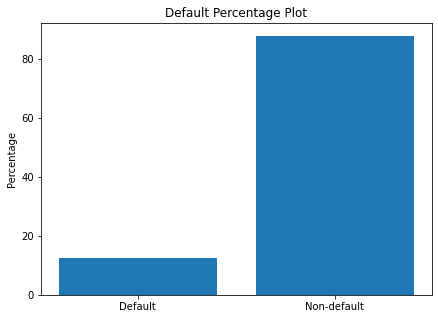

In [8]:
plt.figure(figsize=(7,5))
plt.bar(['Default', 'Non-default'], [default, non_default])
plt.ylabel("Percentage")
plt.title("Default Percentage Plot")
plt.show()

We can see that there is only 12.3% are defaulters. We will take care of the class imbalance later.

### Checking unique values of all the categorical columns

In [9]:
# Married/Single
df['Married/Single'].value_counts()

single     226272
married     25728
Name: Married/Single, dtype: int64

In [10]:
# House_Ownership      
df['House_Ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [11]:
# Car_Ownership              
df['Car_Ownership'].value_counts()

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

In [12]:
# Profession                         
df['Profession'].value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [13]:
# CITY                         
df['CITY'].value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [14]:
# State                         
df['STATE'].value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

In [15]:
# Replace Uttar_Pradesh[5] to Uttar_Pradesh
df['STATE'].replace({'Uttar_Pradesh[5]' : 'Uttar_Pradesh'}, inplace=True)

# Exploratory Data Analysis

## Univariate Analysis

#### Default rate on basis of Marital status

In [16]:
new_df = df.groupby(['Married/Single'])['Risk_Flag'].sum().reset_index()
new_df['Default Percent'] = round((new_df['Risk_Flag'] / new_df['Risk_Flag'].sum())*100,2)
new_df

,Married/Single,Risk_Flag,Default Percent
0,married,2636,8.5
1,single,28360,91.5


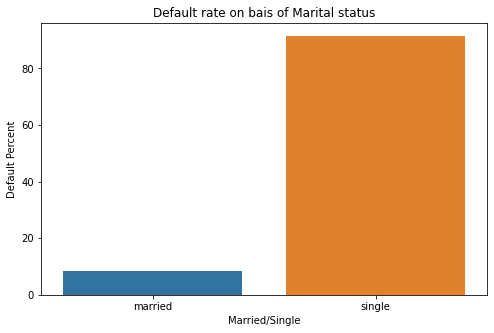

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x='Married/Single', y='Default Percent', data=new_df)
plt.title('Default rate on bais of Marital status')
plt.show()

#### Default rate on basis of House Ownership

In [18]:
new_df = df.groupby(['House_Ownership'])['Risk_Flag'].sum().reset_index()
new_df['Default Percent'] = round((new_df['Risk_Flag'] / new_df['Risk_Flag'].sum())*100,2)
new_df

,House_Ownership,Risk_Flag,Default Percent
0,norent_noown,715,2.31
1,owned,1160,3.74
2,rented,29121,93.95


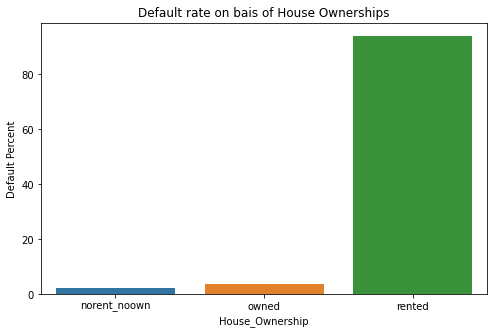

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x='House_Ownership', y='Default Percent', data=new_df)
plt.title('Default rate on bais of House Ownerships')
plt.show()

#### Default rate on basis of Car Ownership

In [20]:
new_df = df.groupby(['Car_Ownership'])['Risk_Flag'].sum().reset_index()
new_df['Default Percent'] = round((new_df['Risk_Flag'] / new_df['Risk_Flag'].sum())*100,2)
new_df

,Car_Ownership,Risk_Flag,Default Percent
0,no,22561,72.79
1,yes,8435,27.21


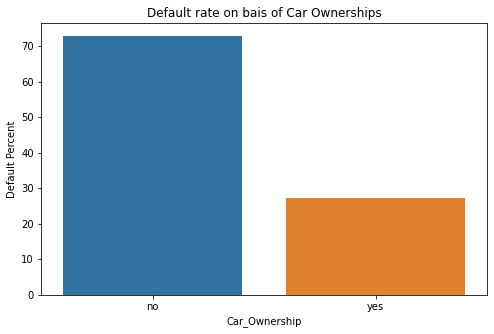

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x='Car_Ownership', y='Default Percent', data=new_df)
plt.title('Default rate on bais of Car Ownerships')
plt.show()

#### Default rate on basis of Profession

In [22]:
new_df = df.groupby(['Profession'])['Risk_Flag'].sum().reset_index()
new_df['Default Percent'] = round((new_df['Risk_Flag'] / new_df['Risk_Flag'].sum())*100,2)
new_df.sort_values('Default Percent', ascending=False, inplace=True)
new_df

,Profession,Risk_Flag,Default Percent
38,Police_officer,826,2.66
43,Software_Developer,750,2.42
0,Air_traffic_controller,715,2.31
46,Surveyor,714,2.30
3,Army_officer,709,2.29
37,Physician,710,2.29
28,Hotel_Manager,701,2.26
47,Technical_writer,697,2.25
7,Chartered_Accountant,690,2.23
41,Scientist,690,2.23


#### Default rate on basis of State

In [23]:
new_df = df.groupby(['STATE'])['Risk_Flag'].sum().reset_index()
new_df['Default Percent'] = round((new_df['Risk_Flag'] / new_df['Risk_Flag'].sum())*100,2)
new_df.sort_values('Default Percent', ascending=False, inplace=True)
new_df

,STATE,Risk_Flag,Default Percent
25,Uttar_Pradesh,3440,11.10
27,West_Bengal,3009,9.71
0,Andhra_Pradesh,2935,9.47
14,Maharashtra,2895,9.34
2,Bihar,2583,8.33
13,Madhya_Pradesh,2180,7.03
22,Tamil_Nadu,1706,5.50
6,Gujarat,1343,4.33
20,Rajasthan,1292,4.17
10,Jharkhand,1195,3.86


## Bivariate Analysis

#### Default rate on House Ownership and Car Ownership

In [24]:
new_df = df.groupby(['House_Ownership', 'Car_Ownership'])['Risk_Flag'].sum().reset_index()
new_df['Default Percent'] = round((new_df['Risk_Flag'] / new_df['Risk_Flag'].sum())*100,2)
new_df

,House_Ownership,Car_Ownership,Risk_Flag,Default Percent
0,norent_noown,no,481,1.55
1,norent_noown,yes,234,0.75
2,owned,no,892,2.88
3,owned,yes,268,0.86
4,rented,no,21188,68.36
5,rented,yes,7933,25.59


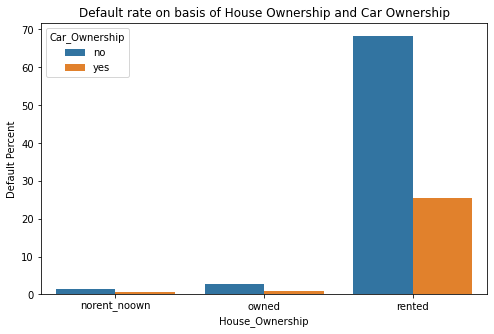

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(data=new_df, x='House_Ownership', y='Default Percent', hue='Car_Ownership')
plt.title('Default rate on basis of House Ownership and Car Ownership')
plt.show()

#### Default rate on basis of Marital Status and House Ownership

In [26]:
new_df = df.groupby(['House_Ownership', 'Married/Single'])['Risk_Flag'].sum().reset_index()
new_df['Default Percent'] = round((new_df['Risk_Flag'] / new_df['Risk_Flag'].sum())*100,2)
new_df

,House_Ownership,Married/Single,Risk_Flag,Default Percent
0,norent_noown,married,36,0.12
1,norent_noown,single,679,2.19
2,owned,married,103,0.33
3,owned,single,1057,3.41
4,rented,married,2497,8.06
5,rented,single,26624,85.89


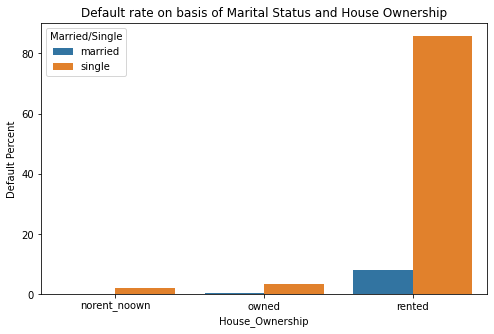

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(data=new_df, x='House_Ownership', y='Default Percent', hue='Married/Single')
plt.title('Default rate on basis of Marital Status and House Ownership')
plt.show()

#### Default rate on basis of Marital Status and Car Ownership

In [28]:
new_df = df.groupby(['Car_Ownership', 'Married/Single'])['Risk_Flag'].sum().reset_index()
new_df['Default Percent'] = round((new_df['Risk_Flag'] / new_df['Risk_Flag'].sum())*100,2)
new_df

,Car_Ownership,Married/Single,Risk_Flag,Default Percent
0,no,married,1948,6.28
1,no,single,20613,66.50
2,yes,married,688,2.22
3,yes,single,7747,24.99


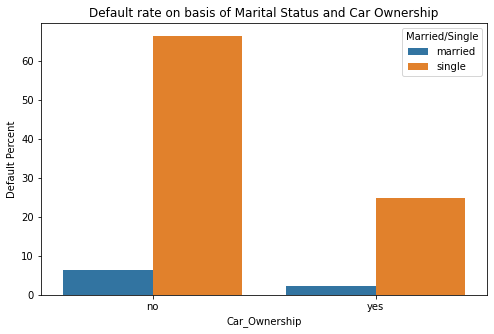

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(data=new_df, x='Car_Ownership', y='Default Percent', hue='Married/Single')
plt.title('Default rate on basis of Marital Status and Car Ownership')
plt.show()

#### Default status on Income distribution

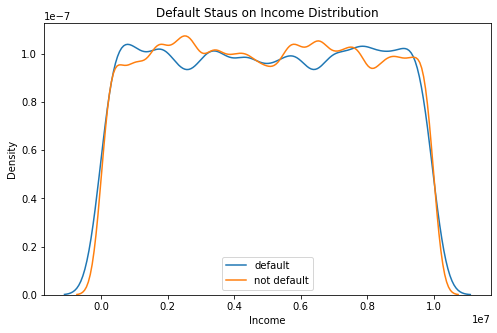

In [30]:
default = df[df['Risk_Flag'] == 1]
non_default = df[df['Risk_Flag'] == 0]

plt.figure(figsize=(8,5))
ax = sns.distplot(default['Income'], label='default', hist=False)
ax = sns.distplot(non_default['Income'], label='not default', hist=False)
ax.set(xlabel='Income')
plt.title('Default Staus on Income Distribution')
plt.legend()
plt.show()

#### Default status on Experience

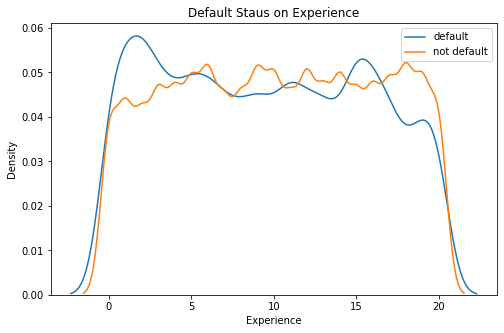

In [31]:
plt.figure(figsize=(8,5))
ax = sns.distplot(default['Experience'], label='default', hist=False)
ax = sns.distplot(non_default['Experience'], label='not default', hist=False)
plt.title('Default Staus on Experience')
ax.set(xlabel='Experience')
plt.legend()
plt.show()

#### Default status on Age

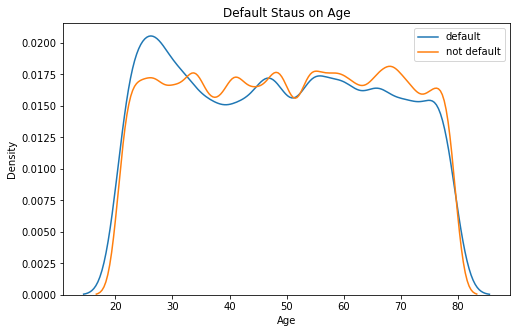

In [32]:
plt.figure(figsize=(8,5))
ax = sns.distplot(default['Age'], label='default', hist=False)
ax = sns.distplot(non_default['Age'], label='not default', hist=False)
plt.title('Default Staus on Age')
ax.set(xlabel='Age')
plt.legend()
plt.show()

#### Checking the correlation of the numeric variables

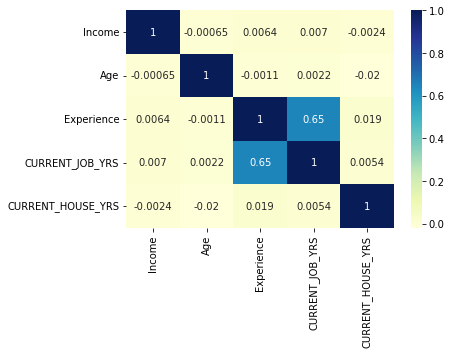

In [33]:
sns.heatmap(df[['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']].corr(), cmap="YlGnBu", annot=True)
plt.show()

# Prepare the data for modelling

## Feature Engineering

### Outliers Treatment

In [34]:
numeric_cols = list(df.select_dtypes(exclude=['object']).columns)
numeric_cols.remove('Risk_Flag')
numeric_cols

['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

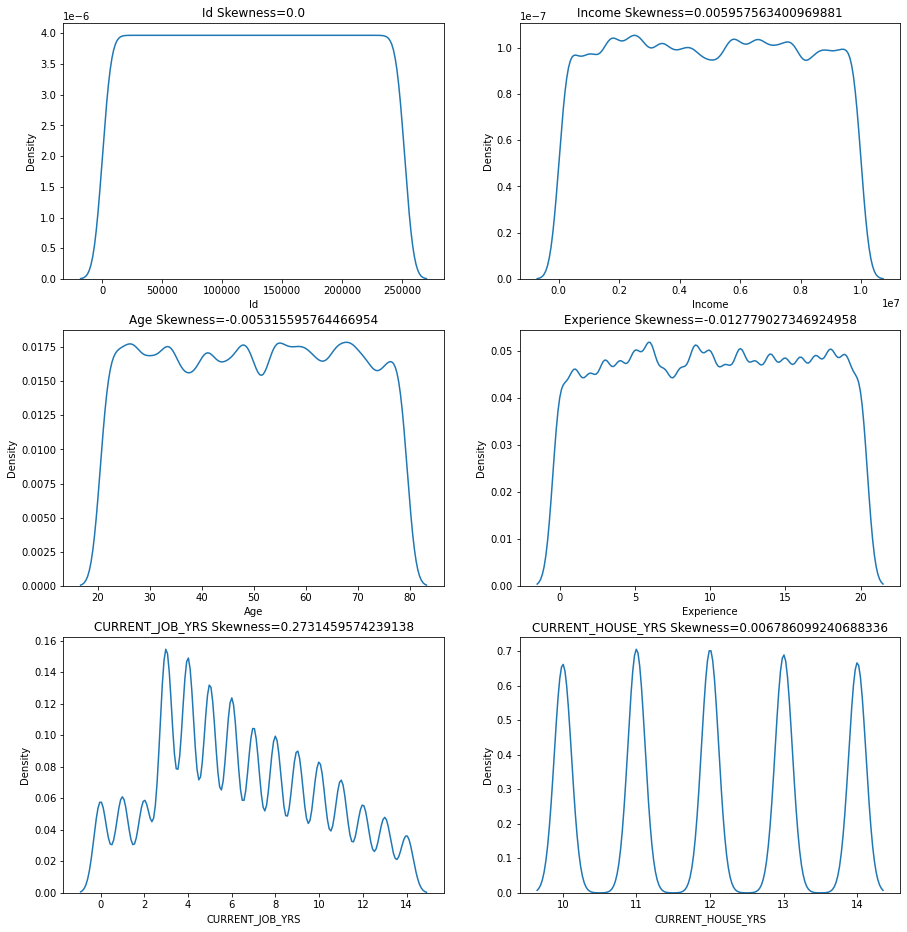

In [35]:
# Checking the skewness of the numeric columns
k=0
plt.figure(figsize=(15,16))
for col in numeric_cols:
    k=k+1
    plt.subplot(3,2,k)
    sns.distplot(df[col], hist=False)
    plt.title(col+' Skewness='+str(df[col].skew()))

The numeric data is more or less normally distributed. There is no need for the outlier removal as such. 

## Dealing with Imbalance Data

### Random Under Sampling

In [36]:
# Since the classes are highly skewed, we should make them equivalent in order to have a normal distribution of the classes.
# Shuffle the data before creating the subsamples

df = df.sample(frac=1)

risk_data = df.loc[df["Risk_Flag"] == 1]
not_risk_data = df.loc[df["Risk_Flag"] == 0][:30996]

normal_distributed_data = pd.concat([risk_data, not_risk_data])

# Shuffle the rows
df2 = normal_distributed_data.sample(frac=1, random_state=42)

df2.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
195852,195853,7575197,28,12,single,rented,no,Scientist,Maheshtala,West_Bengal,12,14,0
124321,124322,3345583,32,2,single,rented,no,Mechanical_engineer,Ozhukarai,Puducherry,2,14,0
198572,198573,84792,77,2,single,rented,no,Financial_Analyst,Hubliâ€“Dharwad,Karnataka,2,13,0
35288,35289,3424035,24,2,single,rented,no,Statistician,Malda,West_Bengal,2,14,1
36122,36123,7167091,51,19,single,rented,yes,Army_officer,Barasat,West_Bengal,6,11,1


## Encoding the categorical variables - Label Encoding

In [37]:
# from sklearn.preprocessing import LabelEncoder

# # define column has type Object to implement LabelEncoder
# list_object = df2.select_dtypes("object").columns.tolist()
# encoder = LabelEncoder()

# for col in list_object:
#     df2[col] = encoder.fit_transform(df2[col].values.tolist())

In [38]:
from sklearn.preprocessing import LabelEncoder

# define column has type Object to implement LabelEncoder
list_object = df2.select_dtypes("object").columns.tolist()
encoder = LabelEncoder()

for col in list_object:
    encoder.fit(df2[col])
    transformed_data = encoder.transform(df2[col])
    print(dict(zip(encoder.classes_, transformed_data)))
    df2[col] = transformed_data

{'married': 1, 'single': 1}
{'norent_noown': 2, 'owned': 2, 'rented': 2}
{'no': 0, 'yes': 0}
{'Air_traffic_controller': 41, 'Analyst': 33, 'Architect': 23, 'Army_officer': 44, 'Artist': 3, 'Aviator': 9, 'Biomedical_Engineer': 31, 'Chartered_Accountant': 23, 'Chef': 44, 'Chemical_engineer': 6, 'Civil_engineer': 15, 'Civil_servant': 13, 'Comedian': 21, 'Computer_hardware_engineer': 17, 'Computer_operator': 27, 'Consultant': 32, 'Dentist': 23, 'Design_Engineer': 0, 'Designer': 41, 'Drafter': 23, 'Economist': 15, 'Engineer': 14, 'Fashion_Designer': 40, 'Financial_Analyst': 47, 'Firefighter': 28, 'Flight_attendant': 48, 'Geologist': 41, 'Graphic_Designer': 2, 'Hotel_Manager': 43, 'Industrial_Engineer': 47, 'Lawyer': 3, 'Librarian': 38, 'Magistrate': 49, 'Mechanical_engineer': 45, 'Microbiologist': 4, 'Official': 37, 'Petroleum_Engineer': 21, 'Physician': 15, 'Police_officer': 12, 'Politician': 21, 'Psychologist': 29, 'Scientist': 15, 'Secretary': 9, 'Software_Developer': 49, 'Statistician':

In [39]:
df2.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
195852,195853,7575197,28,12,1,2,0,41,180,27,12,14,0
124321,124322,3345583,32,2,1,2,0,33,220,18,2,14,0
198572,198573,84792,77,2,1,2,0,23,122,11,2,13,0
35288,35289,3424035,24,2,1,2,0,44,181,27,2,14,1
36122,36123,7167091,51,19,1,2,1,3,32,27,6,11,1


## Feature Selection

### Mutual Information of the features

In [40]:
# getting the Mutual Information about the data
X_mutual = df2.astype("int64").reset_index().copy()
y_mutual = X_mutual.pop("Risk_Flag")

del X_mutual["Id"]
del X_mutual["index"]

In [41]:
# MI scores function
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X_mutual, y_mutual):
    mi_scores = mutual_info_classif(X_mutual, y_mutual, discrete_features='auto')
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_mutual.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_mutual, y_mutual)
mi_scores.to_frame()

,MI Scores
Married/Single,0.006507
Age,0.005234
CURRENT_JOB_YRS,0.004532
House_Ownership,0.004218
CURRENT_HOUSE_YRS,0.003484
STATE,0.003140
Car_Ownership,0.002227
Profession,0.001987
Experience,0.001207
CITY,0.000177


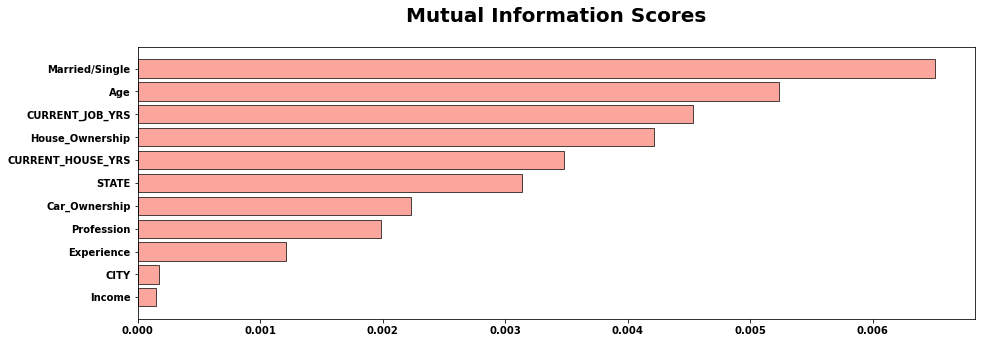

In [42]:
# variables
scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
# plotting
plt.figure(figsize=(15, 5))
plt.barh(width, scores, color="salmon", alpha=0.7, edgecolor="k")
plt.yticks(width, ticks, weight="bold", )
plt.xticks(weight="bold")
plt.title("Mutual Information Scores",
          weight="bold",
          fontsize=20,
          pad=25);

In [43]:
# Selcting the top 7 features as per the Mutual Information Score

features = ["Income", "CITY", "Experience", "Age", 
            "STATE", "Profession", "CURRENT_JOB_YRS"]

X_features = df2[features]
y_labels = df2["Risk_Flag"]

X_features.shape, y_labels.shape

((61992, 7), (61992,))

### Train-Test Split

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_labels, random_state=42, 
    test_size=.25, stratify=y_labels
)

print(f"X_train shape: {X_train.shape} \n"
       f"X_test shape: {X_test.shape} \n"
       f"y_train shape: {y_train.shape} \n"
       f"y_test.shape: {y_test.shape}")

X_train shape: (46494, 7) 
X_test shape: (15498, 7) 
y_train shape: (46494,) 
y_test.shape: (15498,)


# Train Model

In [45]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

In [46]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [47]:
# Model evaluation function

def evalution_metrics(X, y, model):
    y_pred = model.predict(X)

    confusion = metrics.confusion_matrix(y, y_pred)
    print(confusion)

    TP = confusion[1,1]
    TN = confusion[0,0]
    FP = confusion[0,1]
    FN = confusion[1,0]

    print("Accuracy:-", metrics.accuracy_score(y, y_pred))
    print("Recall/Sensitivity:-", TP/float(TP+FN))
    print("Precision:-", TP/float(TP+FP))
    print("Specificity:-", TN/float(TN+FP))

    print("ROC-AUC:-", metrics.roc_auc_score(y, model.predict_proba(X)[:,1]))
    draw_roc(y, model.predict_proba(X)[:,1])
    

## XGBoost

In [328]:
param_grid = {
           'subsample': [0.3,0.6,0.9],
           'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 800],
           'colsample_bytree': [0.3, 0.7]
             }

xgb = XGBClassifier()

xgb_cv = GridSearchCV(estimator=xgb,
                     param_grid=param_grid,
                     scoring='roc_auc',
                     cv=3,
                     verbose=1,
                     n_jobs=-1,
                     return_train_score=True)

xgb_cv.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 500, 800],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [332]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 800,
 'subsample': 0.9}

In [53]:
# Train model with best parameters
xgb_model = XGBClassifier(
     colsample_bytree = 0.7,
     learning_rate = 0.1,
     max_depth = 10,
     n_estimators = 800,
     subsample = 0.9)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [54]:
# Train set model performance
evalution_metrics(X_train, y_train, xgb_model)

[[21333  1914]
 [   26 23221]]
Accuracy:- 0.9582741859164623
Recall/Sensitivity:- 0.9988815761173485
Precision:- 0.9238512035010941
Specificity:- 0.9176667957155762
ROC-AUC:- 0.9780179538950755


In [55]:
# Test set model performance
evalution_metrics(X_test, y_test, xgb_model)

[[6756  993]
 [1307 6442]]
Accuracy:- 0.8515937540327784
Recall/Sensitivity:- 0.8313330752355143
Precision:- 0.8664425016812374
Specificity:- 0.8718544328300426
ROC-AUC:- 0.9267897992107882


## Random Forest

In [346]:
param_grid = {
    'max_depth': [4,5,6,7,8],
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [200, 500, 800], 
    'max_features': ['auto','sqrt','log2']
}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           scoring='roc_auc',
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500, 800]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [347]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 800}

In [48]:
# Train model with optimal hyperparamaters

rf_model = RandomForestClassifier(criterion = 'entropy',
                                     max_depth = 24,
                                     max_features = 'sqrt',
                                     min_samples_leaf = 1,
                                     min_samples_split = 10,
                                     n_estimators = 800
                                     )

rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=24, min_samples_split=10,
                       n_estimators=800)

[[21246  2001]
 [  308 22939]]
Accuracy:- 0.9503376779799544
Recall/Sensitivity:- 0.9867509786208973
Precision:- 0.9197674418604651
Specificity:- 0.9139243773390114
ROC-AUC:- 0.9639050860619445


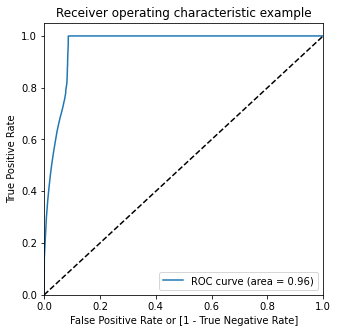

In [49]:
# Train set model performance
evalution_metrics(X_train, y_train, rf_model)

[[6939  810]
 [1655 6094]]
Accuracy:- 0.8409472189959994
Recall/Sensitivity:- 0.7864240547167376
Precision:- 0.8826767091541136
Specificity:- 0.8954703832752613
ROC-AUC:- 0.931348686339889


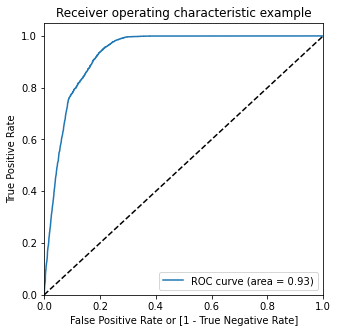

In [50]:
# Test set model performance
evalution_metrics(X_test, y_test, rf_model)

## Decision Tree

In [354]:
param_grid = {
    "max_depth": [int(x) for x in np.linspace(2, 24, 2)], 
    "min_samples_split" : [2, 5, 10], 
    "min_samples_leaf"  : [1, 2, 4], 
    "max_features": ["auto", "sqrt", "log2"],
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"]
}

dt = DecisionTreeClassifier()
dt_cv = GridSearchCV(estimator = dt, 
                           param_grid = param_grid, 
                           cv = 3,
                           scoring='roc_auc',
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

dt_cv.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 24],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [355]:
dt_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 24,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'random'}

In [59]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',
                                     max_depth = 24,
                                     max_features = 'sqrt',
                                     min_samples_leaf = 1,
                                     min_samples_split = 10,
                                     splitter = 'random')

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=24, max_features='sqrt',
                       min_samples_split=10, splitter='random')

In [60]:
# Train set model performance
evalution_metrics(X_train, y_train, dt_model)

[[20916  2331]
 [ 2574 20673]]
Accuracy:- 0.894502516453736
Recall/Sensitivity:- 0.889276035617499
Precision:- 0.8986697965571205
Specificity:- 0.8997289972899729
ROC-AUC:- 0.9586404943391299


In [61]:
# Test set model performance
evalution_metrics(X_test, y_test, dt_model)

[[6664 1085]
 [1304 6445]]
Accuracy:- 0.8458510775583946
Recall/Sensitivity:- 0.8317202219641244
Precision:- 0.8559096945551129
Specificity:- 0.8599819331526649
ROC-AUC:- 0.8663383621773217


# Model Explanation

## SHAP

In [51]:
import shap

explainer = shap.TreeExplainer(rf_model)

### Variable Importance Plot — Global Interpretability

In [52]:
shap_values = explainer.shap_values(X_test[0:100])

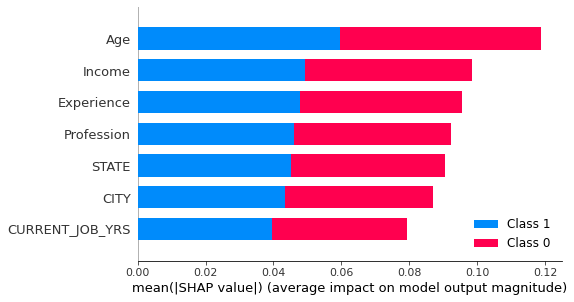

In [53]:
shap.summary_plot(shap_values, X_test[0:100], plot_type="bar")

### Global Interpretability

In [54]:
start_index = 0
end_index = 50

shap.initjs()

shap_value_local = explainer.shap_values(X_test[start_index:end_index])
shap.force_plot(explainer.expected_value[1], shap_value_local[1], X_test[start_index:end_index])

### Local Interpretability

In [55]:
# Class 1 - Defaulters

start_index = 0
end_index = 1

print(X_test[start_index:end_index])
print("\nActual-",y_test[start_index:end_index])
prediction = rf_model.predict(X_test[start_index:end_index])[0]
print("\nPrediction-",prediction)

shap.initjs()

shap_value_local = explainer.shap_values(X_test[start_index:end_index])
shap.force_plot(explainer.expected_value[1], shap_value_local[1], X_test[start_index:end_index])

         Income  CITY  Experience  Age  STATE  Profession  CURRENT_JOB_YRS
220358  6611739   227          19   38     14          45               13

Actual- 220358    1
Name: Risk_Flag, dtype: int64

Prediction- 0


In [56]:
# Class 0 - Not Defaulters

start_index = 4
end_index = 5

print(X_test[start_index:end_index])
print("\nActual-",y_test[start_index:end_index])
prediction = rf_model.predict(X_test[start_index:end_index])[0]
print("\nPrediction-",prediction)

shap.initjs()

shap_value_local = explainer.shap_values(X_test[start_index:end_index])
shap.force_plot(explainer.expected_value[1], shap_value_local[1], X_test[start_index:end_index])

         Income  CITY  Experience  Age  STATE  Profession  CURRENT_JOB_YRS
221913  8082672   196          12   34      2          50                7

Actual- 221913    0
Name: Risk_Flag, dtype: int64

Prediction- 0


## LIME

In [57]:
from interpret.blackbox import LimeTabular
from interpret import show

In [58]:
rf_model.predict_proba

<bound method ForestClassifier.predict_proba of RandomForestClassifier(criterion='entropy', max_depth=24, min_samples_split=10,
                       n_estimators=800)>

In [59]:
lime = LimeTabular(rf_model, 
                   data=X_train, 
                   random_state=1)

# Get local explanations
lime_local = lime.explain_local(X_test[0:10], 
                                y_test[0:10], 
                                name='LIME')

In [60]:
show(lime_local)

<!-- http://127.0.0.1:7001/1929572133568/ -->